In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
# Parameters

In [3]:
df=pd.read_csv(path)
print("The dataset that we are dealing consists of {} rows & {} columns".format(df.shape[0],df.shape[1]))

The dataset that we are dealing consists of 425 rows & 11 columns


Key summary attributes of the data

In [4]:
df.head()

Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


Except the indexing column 'Unnamed' being integer , all other columns are of datatype object

Let's drop the indexing column as it may not be required further

In [6]:
df=df.drop(['Unnamed: 0'],axis=1)

In [7]:
df.head()

Data   Countries     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   
1  2016-01-02 00:00:00  Country_02  Local_02          Mining              I   
2  2016-01-06 00:00:00  Country_01  Local_03          Mining              I   
3  2016-01-08 00:00:00  Country_01  Local_04          Mining              I   
4  2016-01-10 00:00:00  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

In [8]:
df.isna().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [9]:
df.isnull().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [10]:
df.duplicated().any()

True

There are no missing values in this dataset, lets check some key attributes of the data like :
1. Unique Values
2. Top occuring values 
3. Occurence Frequency

In [11]:
df.describe().T

count unique  \
Data                       425    287   
Countries                  425      3   
Local                      425     12   
Industry Sector            425      3   
Accident Level             425      5   
Potential Accident Level   425      6   
Genre                      425      2   
Employee or Third Party    425      3   
Critical Risk              425     33   
Description                425    411   

                                                                        top  \
Data                                                    2017-02-08 00:00:00   
Countries                                                        Country_01   
Local                                                              Local_03   
Industry Sector                                                      Mining   
Accident Level                                                            I   
Potential Accident Level                                                 IV   
Genre                                                                  Male   
Employee or Third Party                                         Third Party   
Critical Risk                                                        Others   
Description               During the activity of chuteo of ore in hopper...   

                         freq  
Data                        6  
Countries                 251  
Local                      90  
Industry Sector           241  
Accident Level            316  
Potential Accident Level  143  
Genre                     403  
Employee or Third Party   189  
Critical Risk             232  
Description                 3

In [12]:
df = df.rename(columns = {'Data': 'Date', 'Genre': 'Gender','Employee or Third Party':'Employment Type'}, inplace = False)

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)
df['Day'] = df['Date'].apply(lambda x : x.day)
df['Weekday'] = df['Date'].apply(lambda x : x.day_name())
df.head(3)

Date   Countries     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   

  Potential Accident Level Gender       Employment Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   

     Weekday  
0     Friday  
1   Saturday  
2  Wednesday

As described in the problem statement the date column has the timestamp of the event and it may be easy to just have the year, month and Day of the occurence

Now , Let's drop the Date column

In [14]:
df=df.drop(['Date'],axis=1)

In [15]:
df.head()

Countries     Local Industry Sector Accident Level  \
0  Country_01  Local_01          Mining              I   
1  Country_02  Local_02          Mining              I   
2  Country_01  Local_03          Mining              I   
3  Country_01  Local_04          Mining              I   
4  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender       Employment Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  
0     Friday  
1   Saturday  
2  Wednesday  
3     Friday  
4     Sunday

# Data Visualization

In [16]:
import warnings
warnings.filterwarnings("ignore")

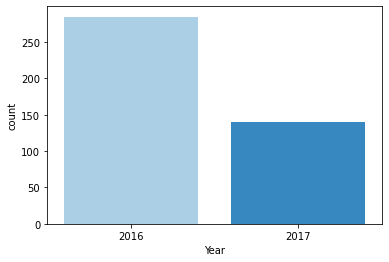

In [17]:
sns.countplot(df['Year'],orient="h",saturation=1,palette='Blues');

In [18]:
Y=df['Year'].value_counts(normalize=True)
print("The number of accidents in {} and in {}".format(Y[:1],Y[1:]))

The number of accidents in 2016    0.670588
Name: Year, dtype: float64 and in 2017    0.329412
Name: Year, dtype: float64


The number of accidents in 2017 has been reduced by almost half

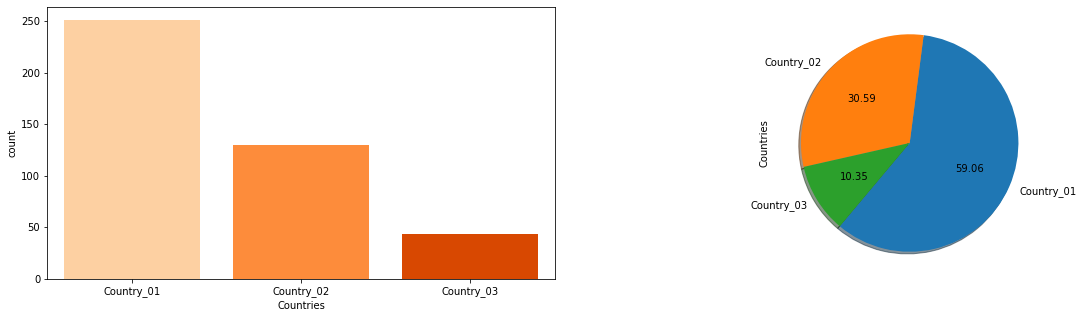

In [19]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.countplot(df['Countries'],orient="h",saturation=1,palette='Oranges',ax=ax[0]);
cty=df.groupby('Countries')['Countries'].count()
cty.plot.pie(shadow=True, startangle=230,autopct='%.2f',ax=ax[1]);

Country_01 is more accident prone and Counrty_03 is less prone to accidents

Below is the city wise representation of accident occurece during the time 2016-2017

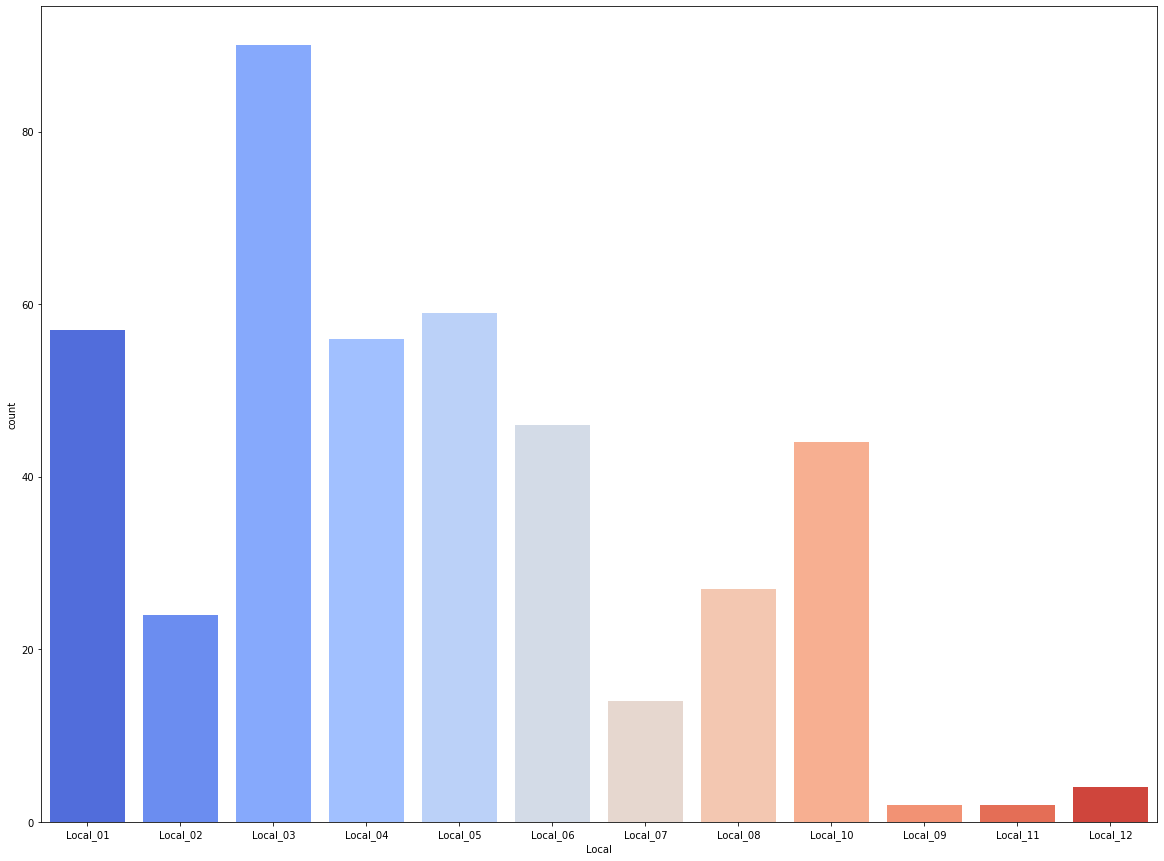

In [21]:
plt.figure(figsize=(20,15))
sns.countplot(df['Local'],orient="h",saturation=1,palette='coolwarm');

Industry wise picturization of accidents , from the below it is evident that mining industry is unfortunate to record more accidents

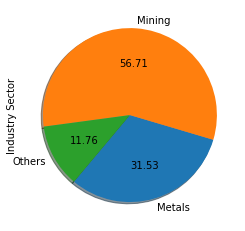

In [23]:
ind=df.groupby('Industry Sector')['Industry Sector'].count()
ind.plot.pie(shadow=True, startangle=230,autopct='%.2f');
#sns.countplot(df['Industry Sector'],orient="h",saturation=1,palette='terrain')

Accident counts based on severity level


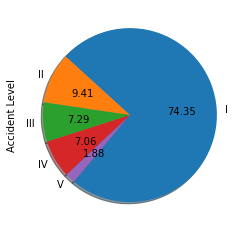

In [24]:
ac_lvl=df.groupby('Accident Level')['Accident Level'].count()
print("Accident counts based on severity level")
ac_lvl.plot.pie(shadow=True, startangle=230,autopct='%.2f');
#sns.countplot(df['Accident Level'],orient="h",saturation=1,palette='cubehelix');

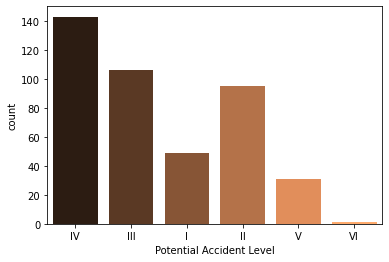

In [25]:
sns.countplot(df['Potential Accident Level'],orient="h",saturation=1,palette='copper');


Type of Injured person
Third Party             0.444706
Employee                0.421176
Third Party (Remote)    0.134118
Name: Employment Type, dtype: float64


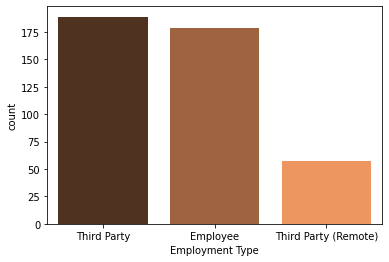

In [26]:
print("Type of Injured person")
print(df['Employment Type'].value_counts(normalize=True))
sns.countplot(df['Employment Type'],orient="h",saturation=1,palette='copper');

some description of the risk involved in the accident


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Pressed'),
  Text(2, 0, 'Manual Tools'),
  Text(3, 0, 'Chemical substances'),
  Text(4, 0, 'Venomous Animals'),
  Text(5, 0, 'Cut'),
  Text(6, 0, 'Projection'),
  Text(7, 0, 'Bees'),
  Text(8, 0, 'Fall'),
  Text(9, 0, 'Vehicles and Mobile Equipment'),
  Text(10, 0, 'remains of choco'),
  Text(11, 0, 'Pressurized Systems'),
  Text(12, 0, 'Fall prevention (same level)'),
  Text(13, 0, 'Suspended Loads'),
  Text(14, 0, 'Fall prevention'),
  Text(15, 0, 'Power lock'),
  Text(16, 0, 'Blocking and isolation of energies'),
  Text(17, 0, 'Liquid Metal'),
  Text(18, 0, 'Pressurized Systems / Chemical Substances'),
  Text(19, 0, 'Machine Protection'),
  Text(20, 0, 'Electrical Shock'),
  Text(21, 0, 'Projection of fragments'),
  Text(22, 0, 'Projection/Choco'),
  Text(23, 0, 'Traffic'),
  Text(24, 0, 'Burn'),
 

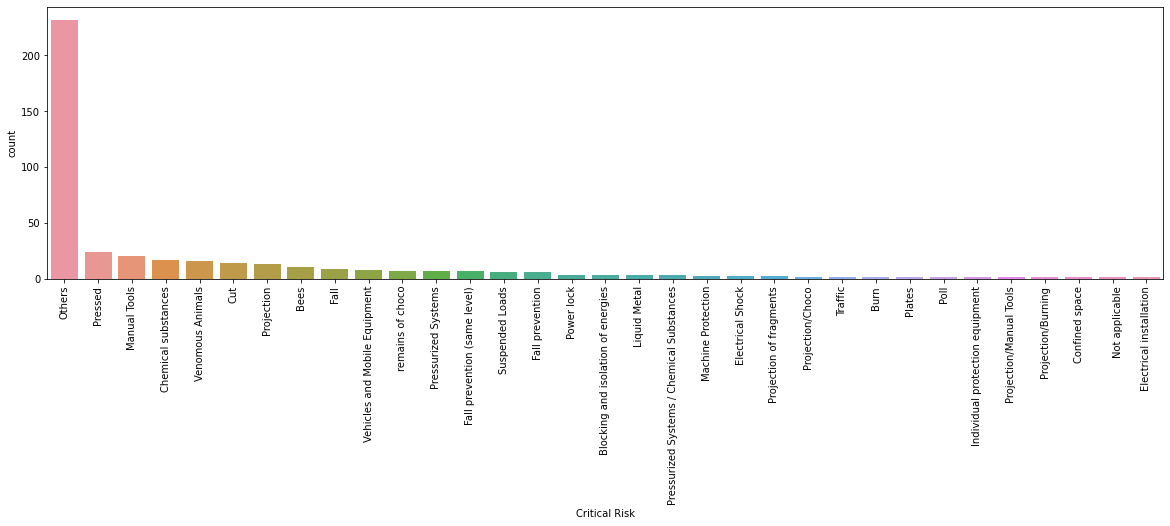

In [27]:
print("some description of the risk involved in the accident")
plt.figure(figsize=(20,5))
descending_order = df['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(x=df['Critical Risk'],order=descending_order)
plt.xticks(rotation = 'vertical')

In [28]:
df_ct1=df[df['Countries']=='Country_01']
df_ct2=df[df['Countries']=='Country_03']
df_ct3=df[df['Countries']=='Country_03']

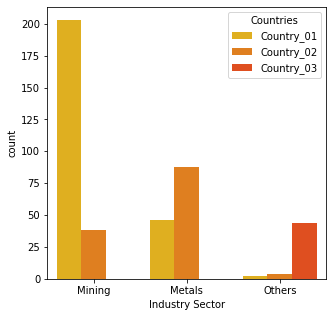

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(df['Industry Sector'],hue=df['Countries'],palette='autumn_r')
plt.show();

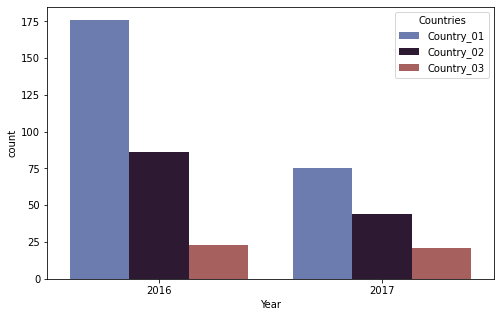

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(df['Year'],hue=df['Countries'],palette='twilight')
plt.show();


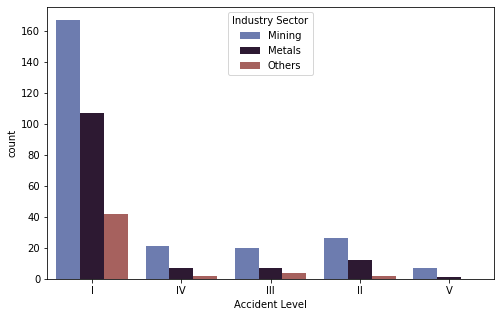

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(df['Accident Level'],hue=df['Industry Sector'],palette='twilight')
plt.show();

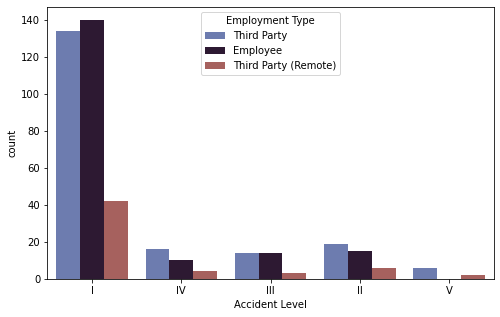

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(df['Accident Level'],hue=df['Employment Type'],palette='twilight')
plt.show();